In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/diabetes_pima.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int64  
 1   Glucosa                 768 non-null    int64  
 2   PresionArterial         768 non-null    int64  
 3   GrosorDeLaPiel          768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncionPedigriDiabetes  768 non-null    float64
 7   Edad                    768 non-null    int64  
 8   Resultado               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Embarazos                 0
Glucosa                   0
PresionArterial           0
GrosorDeLaPiel            0
Insulina                  0
IMC                       0
FuncionPedigriDiabetes    0
Edad                      0
Resultado                 0
dtype: int64

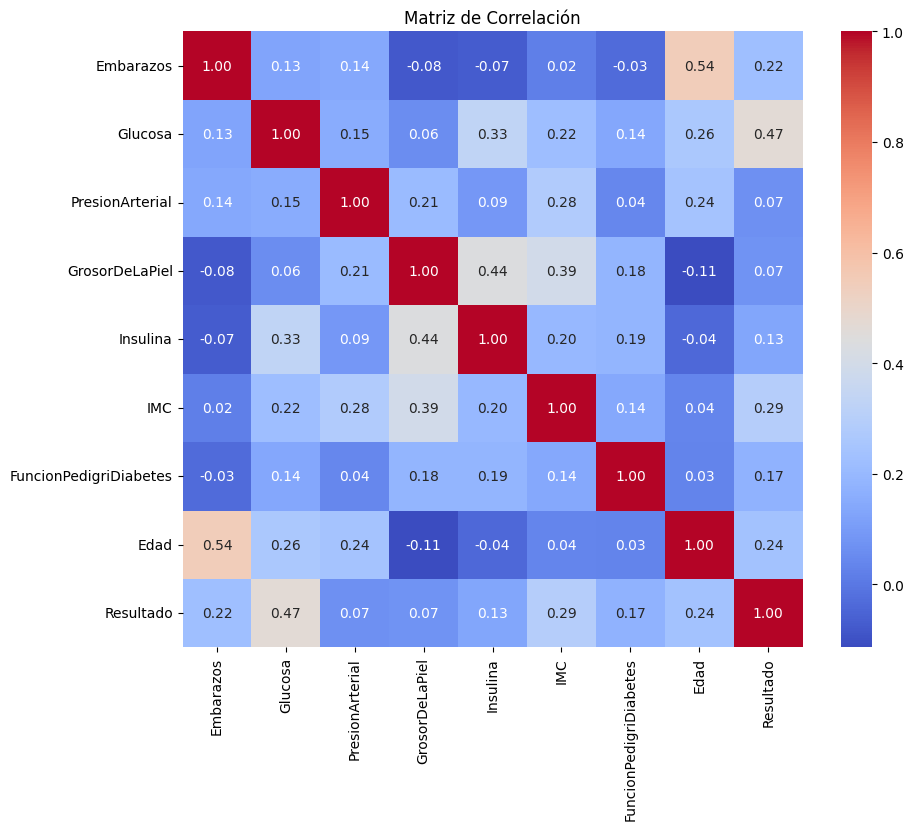

In [28]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# Separar las características (X) y las etiquetas (y)
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values   # La última columna (Resultado)


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


In [21]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convertir las salidas en etiquetas binarias

Epoch 1/10
20/20 [==============================] - 3s 5ms/step - loss: 7.3317 - accuracy: 0.5847
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 6.4653 - accuracy: 0.5912
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 5.7470 - accuracy: 0.5586
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 4.9717 - accuracy: 0.5619
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 4.6130 - accuracy: 0.5847
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 3.9847 - accuracy: 0.5912
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 3.1137 - accuracy: 0.6254
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 2.7896 - accuracy: 0.5961
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 2.5784 - accuracy: 0.5814
Epoch 10/10
5/5 [==============================] - 0s 3ms/step


In [22]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)


Matriz de Confusión:
 [[78 21]
 [25 30]]


In [23]:

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.7012987012987013


In [24]:
# Mostrar el informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:\n", class_report)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154

